In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
os.environ["KAGGLE_CONFID_DIR"] = '/content/drive/MyDrive/GANs'

In [3]:
%cd '/content/drive/MyDrive/GANs'

/content/drive/MyDrive/GANs


In [4]:
!pwd

/content/drive/MyDrive/GANs


In [ ]:
!kaggle datasets download -d spandan2/cats-faces-64x64-for-generative-models

Dataset URL: https://www.kaggle.com/datasets/spandan2/cats-faces-64x64-for-generative-models
License(s): unknown
 99% 95.0M/96.0M [00:07<00:00, 21.5MB/s]
100% 96.0M/96.0M [00:07<00:00, 13.4MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: cats/cats/5499.jpg      
  inflating: cats/cats/55.jpg        
  inflating: cats/cats/550.jpg       
  inflating: cats/cats/5500.jpg      
  inflating: cats/cats/5501.jpg      
  inflating: cats/cats/5502.jpg      
  inflating: cats/cats/5503.jpg      
  inflating: cats/cats/5504.jpg      
  inflating: cats/cats/5505.jpg      
  inflating: cats/cats/5506.jpg      
  inflating: cats/cats/5507.jpg      
  inflating: cats/cats/5508.jpg      
  inflating: cats/cats/5509.jpg      
  inflating: cats/cats/551.jpg       
  inflating: cats/cats/5510.jpg      
  inflating: cats/cats/5511.jpg      
  inflating: cats/cats/5512.jpg      
  inflating: cats/cats/5513.jpg      
  inflating: cats/cats/5514.jpg      
  inflating: cats/cats/5515.jpg      
  inflating: cats/cats/5516.jpg      
  inflating: cats/cats/5517.jpg      
  inflating: cats/cats/5518.jpg      
  inflating: cats/cats/5519.jpg      
  inflating: cats/cats/552.jpg       
  i

In [5]:
data_dir = "/content/drive/MyDrive/GANs/cats/cats"

In [6]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision.utils import make_grid
import pandas as pd

In [7]:
image_files = [f for f in os.listdir(data_dir)]

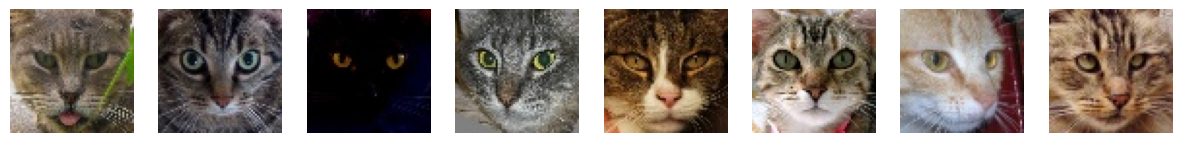

In [8]:
plt.figure(figsize=(15,4))
for i,image_file in enumerate(image_files[:8]):
    img_path = os.path.join(data_dir,image_file)
    img = Image.open(img_path)
    plt.subplot(1,8,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [9]:
subdirectories = [f.path for f in os.scandir(data_dir) if f.is_dir()]
print(len(subdirectories))

0


In [10]:
num_images = 0
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1
    print(f"Found {num_images} images in directory: {dirpath}")
    num_images = 0

Found 15747 images in directory: /content/drive/MyDrive/GANs/cats/cats


In [11]:
import cv2

sizes = []
resolutions = []
color_distributions = []

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.lower().endswith('.jpg'):  # Only process .jpg files
            img_path = os.path.join(dirpath, filename)

            print(f"Processing file: {img_path}")

            img = cv2.imread(img_path)

            if img is None:
                print(f"Warning: Couldn't read image {img_path}")
                continue

            try:
                size = os.path.getsize(img_path)
                sizes.append(size)

                resolution = img.shape[:2]
                resolutions.append(resolution)

                color_distribution = np.bincount(img.flatten(), minlength=256)
                color_distributions.append(color_distribution)

            except Exception as e:
                print(f"Error processing file {img_path}: {e}")

sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

print("Sizes:", sizes)
print("Resolutions:", resolutions)
print("Color Distributions:", color_distributions.shape)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Processing file: /content/drive/MyDrive/GANs/cats/cats/15540.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/14001.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/1700.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/15701.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/14830.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/13262.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/15089.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/13875.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/1343.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/15401.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/14980.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/1900.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/14077.jpg
Processing file: /content/drive/MyDrive/GANs/cats/cats/1666.jpg
Processing file: /content/drive/MyDrive/GANs/ca

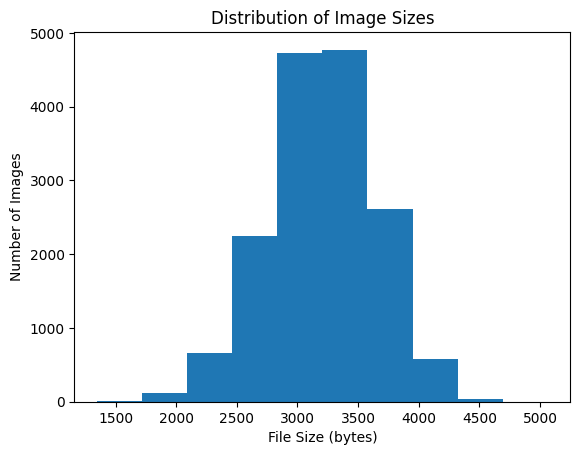

In [12]:
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [13]:
import plotly.express as px
import os

sizes = []

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        # Get the full path of the file
        file_path = os.path.join(dirpath, filename)
        # Get the file size in bytes
        file_size = os.path.getsize(file_path)
        # Convert file size to MB and add to the list
        sizes.append(file_size / 1_000_000)


fig = px.histogram(x=sizes, nbins=50, title="Distribution of Image Sizes")

fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


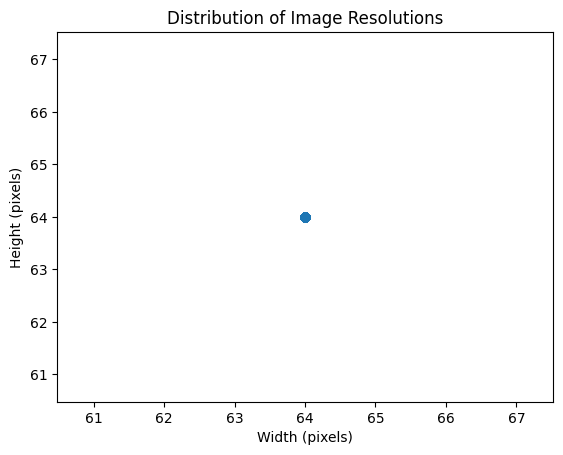

In [14]:
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [15]:
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.show()

In [16]:
df = pd.DataFrame(resolutions, columns=['width', 'height'])

fig = px.scatter_3d(df, x='width', y='height', z=df.index,
                    title='Distribution of Image Resolutions',
                    labels={'width': 'Width (pixels)',
                            'height': 'Height (pixels)',
                            'index': 'Image Index'},
                    color=df.index)

fig.update_traces(marker=dict(size=2, line=dict(width=0.5)))

fig.show()

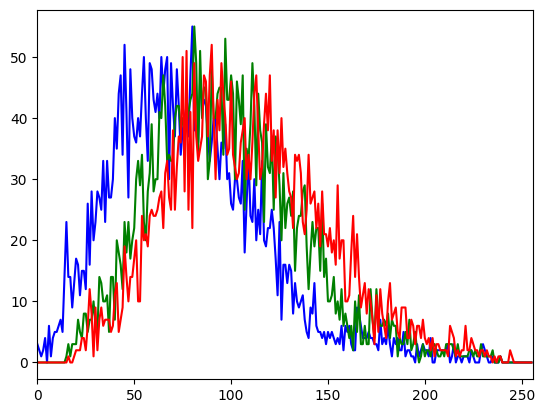

In [17]:
import cv2
img_path = os.path.join(data_dir, image_files[0])
img = cv2.imread(img_path)
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

In [18]:
widths, heights = [], []

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)

        img = Image.open(file_path)
        widths.append(img.width)
        heights.append(img.height)

print(f"Ortalama Genişlik: {np.mean(widths)}, Ortalama Yükseklik: {np.mean(heights)}")
print(f"Genişlik Varyansı: {np.var(widths)}, Yükseklik Varyansı: {np.var(heights)}")
# Varyans 0 olduğu için tüm görsellerin boyutu aynı ve 64*64 boyutunda.

Ortalama Genişlik: 64.0, Ortalama Yükseklik: 64.0
Genişlik Varyansı: 0.0, Yükseklik Varyansı: 0.0


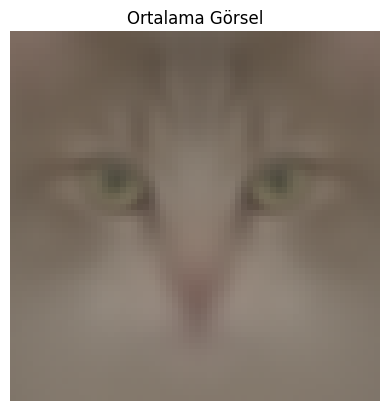

In [20]:
img = Image.open(img_path)
img_array = np.array(img)

mean_image = np.zeros_like(img_array, dtype=np.float64)

for image_file in image_files:
    img_path = os.path.join(data_dir, image_file)
    img = Image.open(img_path)
    img_array = np.array(img)
    mean_image += img_array

mean_image /= len(image_files)
mean_image = mean_image.astype(np.uint8)

plt.imshow(mean_image)
plt.title("Ortalama Görsel")
plt.axis("off")
plt.show()